Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

###### age: age of primary beneficiary

###### sex: insurance contractor gender, female, male

######  bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

###### children: Number of children covered by health insurance / Number of dependents

###### smoker: Smoking

###### region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [63]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [64]:
df.shape

(1338, 7)

In [65]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [66]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [67]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We have 0 missing values which is very good. Now let's do EDA with some cool graphs. First we'll see how the charges are distributed according to given factors

Text(0.5, 1.0, 'Distribution of Charges')

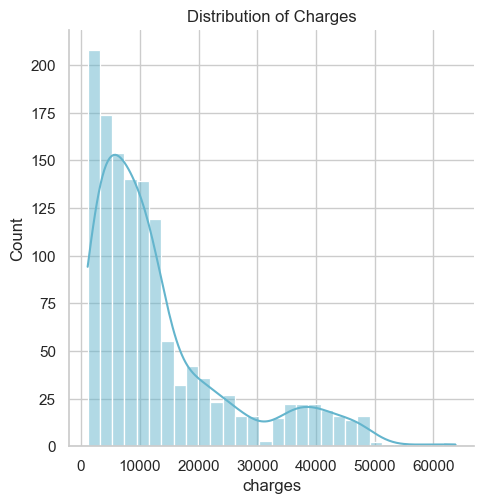

In [68]:
ax = sns.displot(df['charges'],kde=True,color='c')
plt.title('Distribution of Charges')

This distribution is right-skewed. To make it closer to normal we can apply natural log

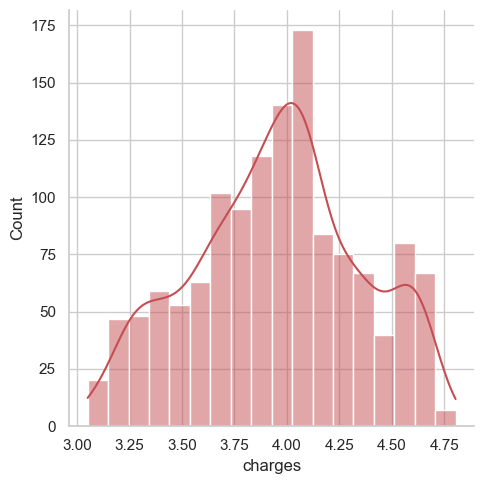

In [69]:
ax = sns.displot(np.log10(df['charges']),kde=True,color='r')

Now let's look at the charges by region

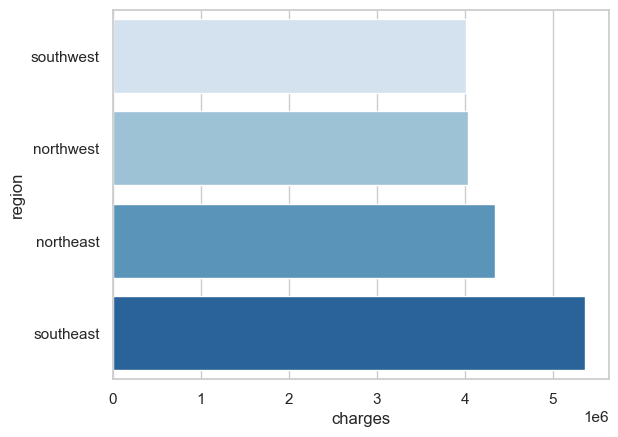

In [70]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)
ax = sns.barplot(x=charges.head(), y=charges.head().index, palette='Blues')

So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region

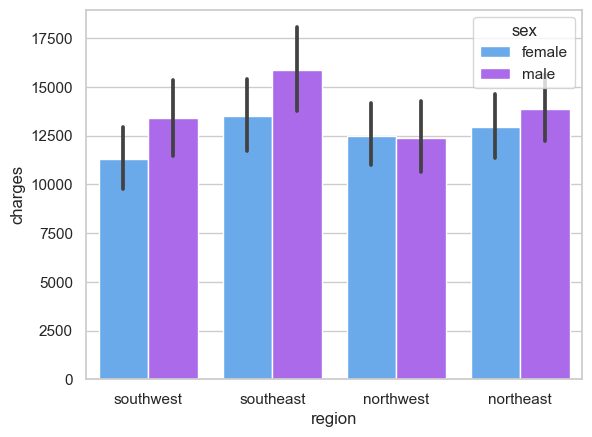

In [71]:
ax=sns.barplot(x='region',y='charges',hue='sex',data=df,palette='cool')

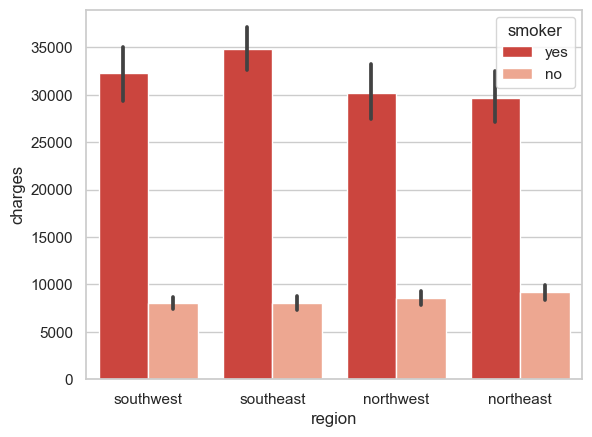

In [72]:
ax=sns.barplot(x='region',y='charges',hue='smoker',data=df,palette='Reds_r')

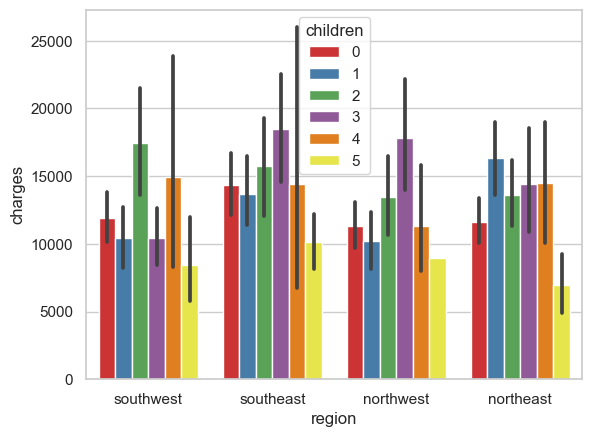

In [73]:
ax = sns.barplot(x='region',y='charges',hue='children',data=df,palette='Set1')

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

Now let's analyze the medical charges by age, bmi and children according to the smoking factor

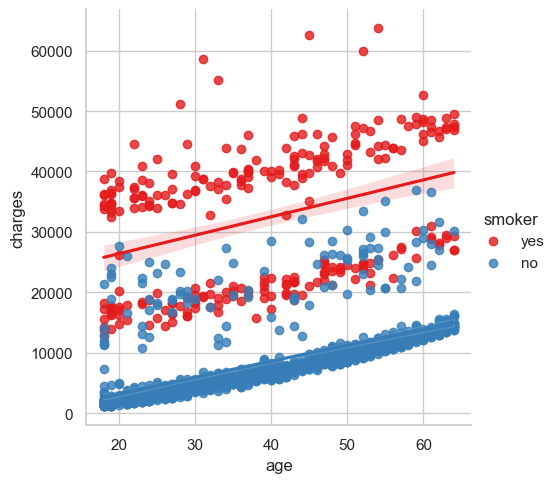

In [74]:
ax = sns.lmplot(x='age',y='charges',hue='smoker',data=df,palette='Set1')

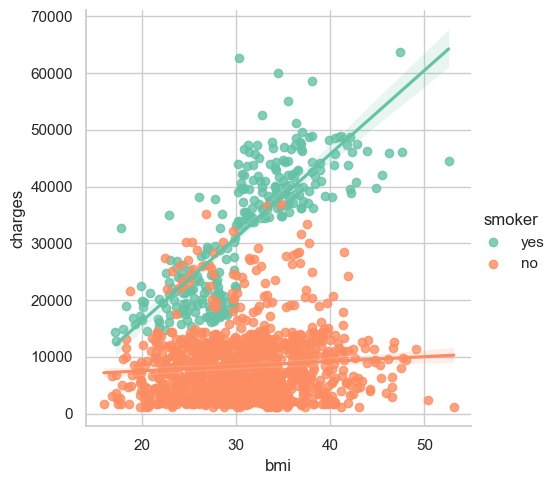

In [75]:
ax = sns.lmplot(x='bmi',y='charges',hue='smoker',data=df,palette='Set2')

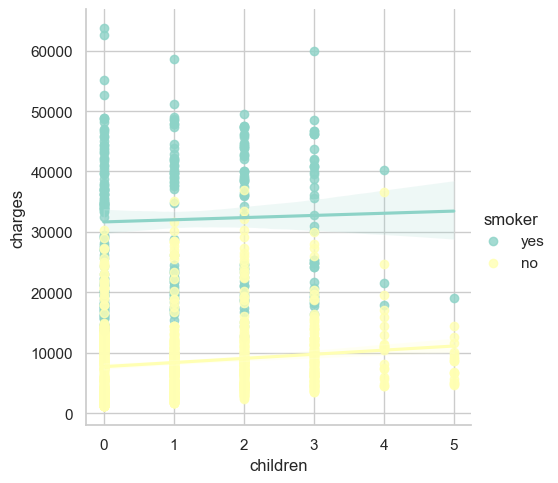

In [76]:
ax = sns.lmplot(x='children',y='charges',hue='smoker',data=df,palette='Set3')

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

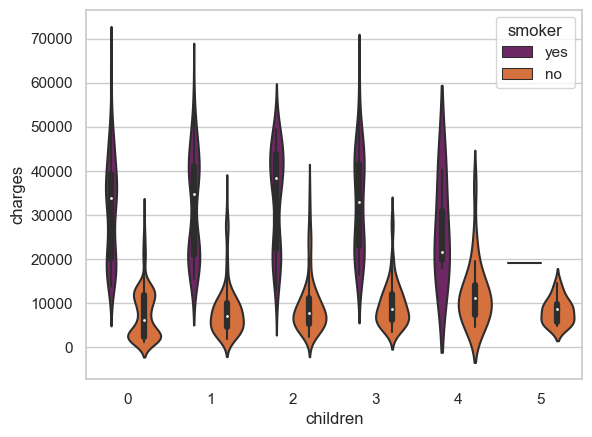

In [77]:
ax = sns.violinplot(x='children',y='charges',data=df,hue='smoker',orient='v',palette='inferno')

In [78]:
df[['sex','smoker','region']] = df[['sex','smoker','region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [79]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

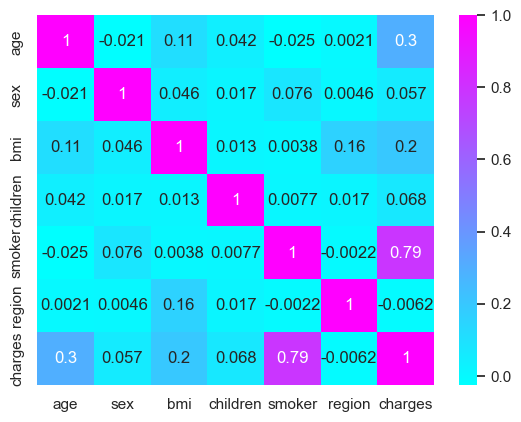

In [80]:
ax = sns.heatmap(df.corr(),annot=True,cmap='cool')

No correlation, except with the smoking

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x = df.drop(['charges'],axis=1)
y=df['charges']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
model = LinearRegression()
model.fit(x_train,y_train)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R^2 Score:", model.score(x_test, y_test))

Intercept: -11661.983908824413
Coefficients: [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
R^2 Score: 0.799874714544996


In [82]:
from sklearn.ensemble import RandomForestRegressor
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=1, n_jobs=-1)
Rfr.fit(x_train, y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)
print(metrics.mean_squared_error(x_train_pred,y_train))
print(metrics.mean_squared_error(x_test_pred,y_test))

3628893.8873538924
19730453.91007201


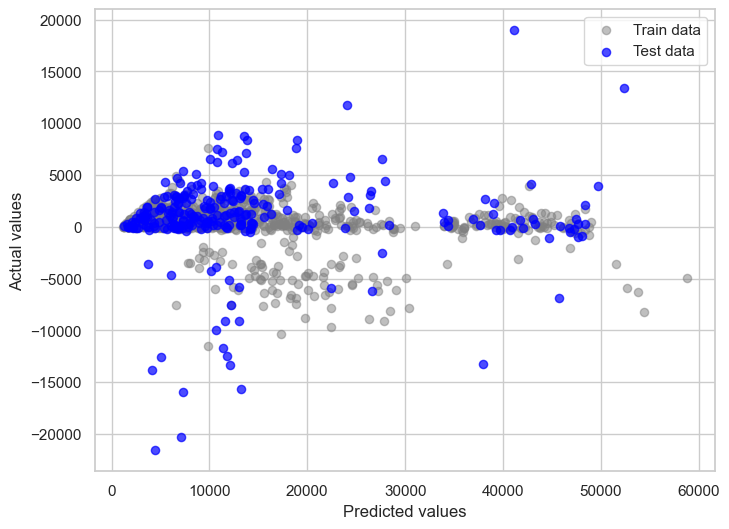

In [83]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred,x_train_pred-y_train,c='gray',marker='o',s=35,alpha=0.5,label='Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,c = 'blue', marker = 'o', s = 35, alpha = 0.7,label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')


Feature importance ranking


1. smoker (0.601678)
2. bmi (0.218831)
3. age (0.136943)
4. children (0.020990)
5. region (0.015165)
6. sex (0.006393)


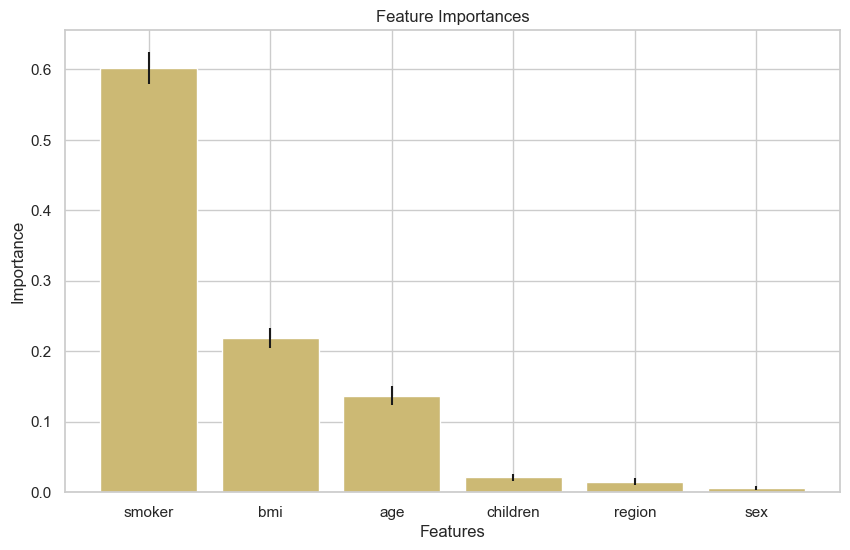

In [84]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d. %s (%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(importance_list, importances[indices], color="y", yerr=std[indices], align="center")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [87]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df.drop(['charges', 'sex', 'region'], axis=1)
y = df['charges']

pol = PolynomialFeatures(degree=2)
x_pol = pol.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.2, random_state=0)

Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)

y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)

print("Intercept:", Pol_reg.intercept_)
print("Coefficients:", Pol_reg.coef_)
print("R^2 Score:", Pol_reg.score(x_test, y_test))


Intercept: -5325.881705253554
Coefficients: [ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
R^2 Score: 0.8812595703345231


In [89]:
print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.495045477636
Mean Squared Error: 18895160.098780356
Root Mean Squared Error: 4346.856346692442


In [91]:
y_test_pred = Pol_reg.predict(x_test)
df = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
df

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268
